## Introduction

The main libraries used in the audio programming with Python lessons are:

* [NumPy](http://www.numpy.org/) for basic numerical computation
* [SciPy](http://www.scipy.org/) for scientic computation
* [matplotlib](http://matplotlib.org/) for visualization
* [librosa](https://librosa.org/) for audio signal feature extraction
* [thinkdsp](http://greenteapress.com/thinkdsp.html) for working with signals and spectrums

NumPy, SciPy and matplotlib are well-known and widely used packages.

librosa is a Python package for music and audio analysis. In this course, we will mainly use librosa for audio signal feature extraction.

thinkdsp is a Python module that accompanies [Think DSP](https://greenteapress.com/thinkdsp/thinkdsp.pdf), the primary reference book for the part of the course about audio programming with Python. This module contains classes and functions for working with signals and spectrums. Most of the functions it provides are thin wrappers around functions from NumPy and SciPy that helps to learn the core ideas of signal processing.

Documentation of the thinkdsp module is [here](https://greenteapress.com/thinkdsp.html).

## Signals

In the thinkdsp module, a Signal represents a continuous function that can be evaluated at any point in time.

The following code creates a sine signal. `freq` is frequency in Hz, `amp` the amplitude that ranges in value between -1 and 1, and `offset` is the phase in radians. (Phase specifies the location or timing of a point within a wave cycle of a repetitive waveform. For example, if `offset`=0 the sine signal starts with an amplitude of sin 0, which is 0. With `offset`=$ \frac{\pi}{2} $, it starts at 1, since $ sin \frac{\pi}{2} = 1 $.)

In [9]:
from thinkdsp import SinSignal
from thinkdsp import decorate

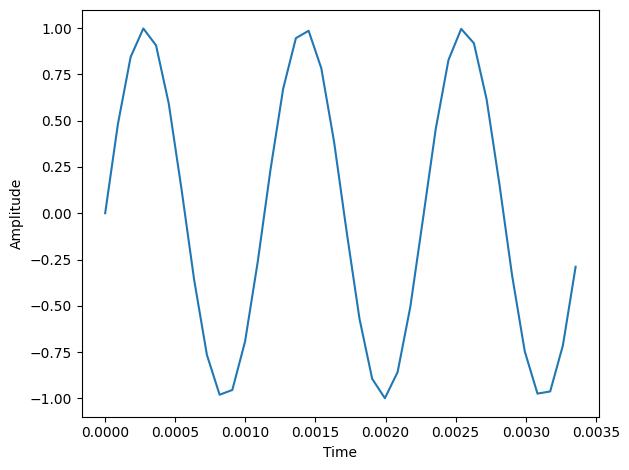

In [10]:
sin_sig = SinSignal(freq=880, amp=1, offset=0)
sin_sig.plot()
decorate(xlabel='Time', ylabel='Amplitude')

Other basic signals include square, sawtooth, and triangle signals

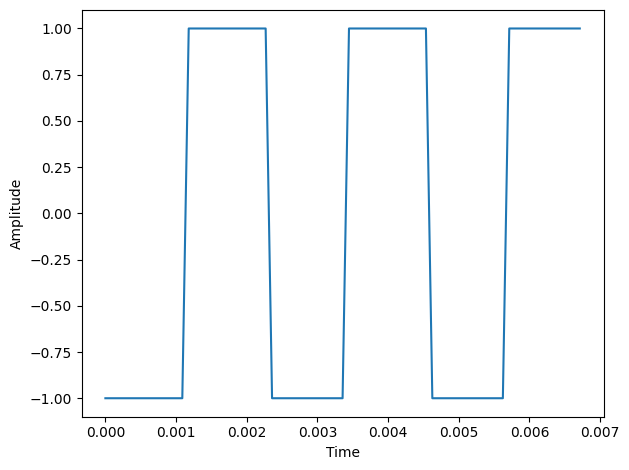

In [11]:
from thinkdsp import SquareSignal, SawtoothSignal, TriangleSignal

squ_sig = SquareSignal(freq=440, amp=1, offset=0)
squ_sig.plot()
decorate(xlabel='Time', ylabel='Amplitude')

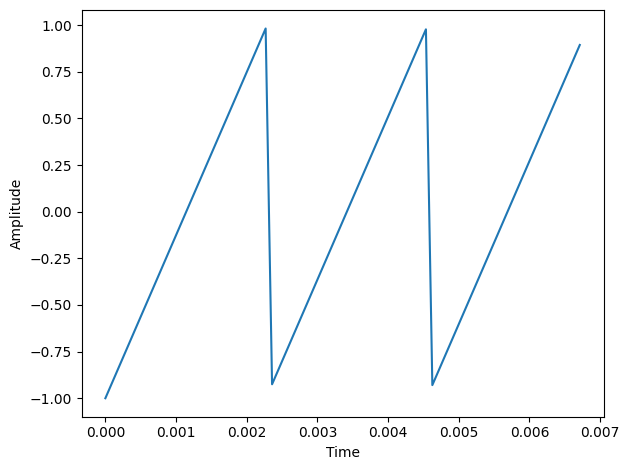

In [12]:
saw_sig = SawtoothSignal(freq=440, amp=1, offset=0)
saw_sig.plot()
decorate(xlabel='Time', ylabel='Amplitude')

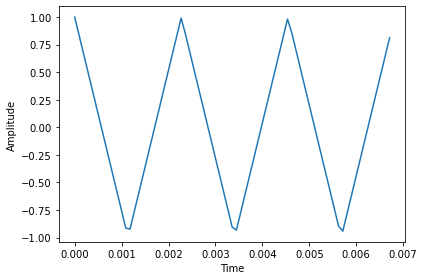

In [5]:
tri_sig = TriangleSignal(freq=440, amp=1, offset=0)
tri_sig.plot()
decorate(xlabel='Time', ylabel='Amplitude')

## Waves

#### Create waves from signals
The thinkdsp class that allows us to create a 'sound file object' is the class Wave.

We can use the method `make_wave` to create a sound file object from a signal. In this example, we evaluate the signal 48000 times per second (the `framerate`) to generate a sound file.

In [13]:
sin_wave = sin_sig.make_wave(duration=1, start=0, framerate=48000)

The interval between samples is the inverse of the framerate.

In [14]:
print('Number of samples', len(sin_wave.ys))
print('Timestep in ms', 1 / sin_wave.framerate * 1000)

Number of samples 48000
Timestep in ms 0.020833333333333332


#### Playing sounds
The easiest way of playing this sound is by using an IPython Audio widget.

The `ys` attribute is an array that contains the samples of the sound object.

In [15]:
from IPython.display import Audio
audio = Audio(data=sin_wave.ys, rate=sin_wave.framerate)
audio

Wave also provides make_audio(), which does the same thing:

In [16]:
sin_wave.make_audio()

#### Create waves from pre-recorded audio files
We can load a pre-recorded audio file in a sound object with the function `read_wave`.

In [18]:
from thinkdsp import read_wave
my_sound = read_wave('../isp-sound1.wav')

In [19]:
audio = Audio(data=my_sound.ys, rate=my_sound.framerate)
audio

#### Segments and clicks
To create a new sound file based on an excerpt of my_sound we can use the `segment` method.

In [20]:
my_segment = my_sound.segment(start=1, duration=2)

In [21]:
audio = Audio(data=my_segment.ys, rate=my_segment.framerate)
audio

When we edit digital audio, it is very important to make sure that the audio does not contain clicks. `apodize` creates a fade in and fade out effect at the beginning and end of the wave so it doesn't click when you play it.

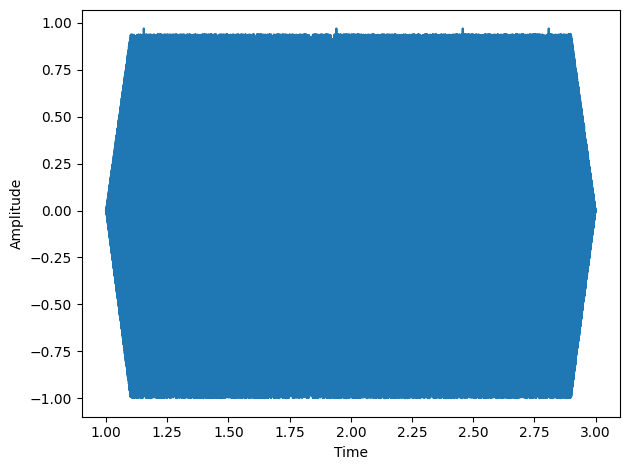

In [22]:
my_segment.apodize()
my_segment.plot()
decorate(xlabel='Time', ylabel='Amplitude')

In [23]:
audio = Audio(data=my_segment.ys, rate=my_segment.framerate)
audio

#### Save waves
Finally, we can use the write method to save a wave object as a sound file in a drive of our computer.

In [26]:
my_segment.write('./Audio/myWave.wav')

Writing ./Audio/myWave.wav


## Spectrums

The class Wave provides the method `make_spectrum`, which computes the spectrum of the wave.

In [27]:
spectrum = my_segment.make_spectrum()

Spectrum provides `plot`, which draws the spectrum of the wave.

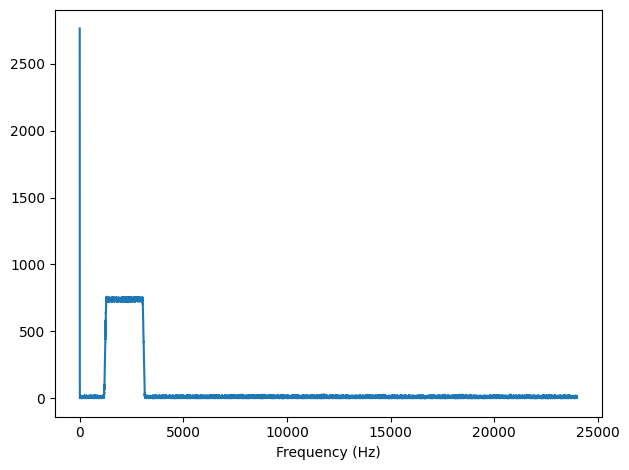

In [28]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

The spectrogram shows the spectrum over time:

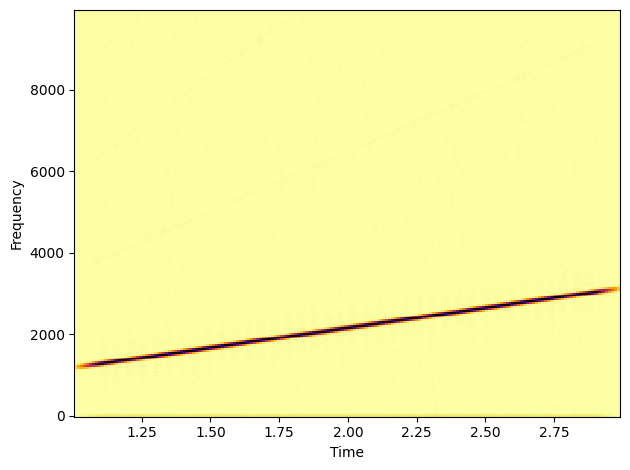

In [29]:
spectrogram = my_segment.make_spectrogram(seg_length=1024)
spectrogram.plot(high=10000)
decorate(xlabel='Time', ylabel='Frequency')

Let's visualise the spectogram of 'From_400Hz_to_4kHz.wav', a pure tone which frequency goes from 400Hz to 4kHz.

In [30]:
my_sound2 = read_wave('../ispsound22.wav')
my_sound2.make_audio()

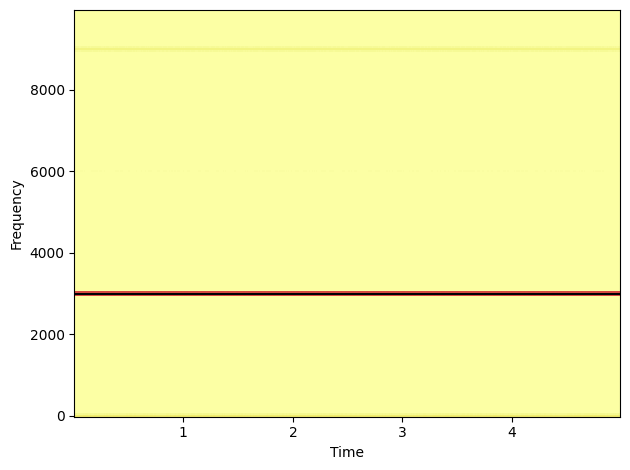

In [31]:
spectrogram = my_sound2.make_spectrogram(seg_length=1024)
spectrogram.plot(high=10000)
decorate(xlabel='Time', ylabel='Frequency')

Note: This lab is based on examples from [Think DSP](https://greenteapress.com/thinkdsp/thinkdsp.pdf) by Allen B. Downey.